In [1]:
import pandas
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, mean_squared_error, r2_score, explained_variance_score, make_scorer
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
from xgboost import plot_importance

#import shap
import scipy.stats as st
from scipy.stats import randint, poisson
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
plt.rcParams['font.size'] = 18
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import random
from itertools import combinations
from matplotlib.font_manager import FontProperties
from tqdm import tqdm

#plt.style.use('ggplot'); plt.style.use('seaborn-ticks')

plt.style.use('seaborn-white')
plt.style.use('seaborn-ticks')

plt.rcParams['font.size'] = 16

In [2]:
df1 = pd.read_csv('data2\etalon_jitter_16Mar20_etalon.ccfSum-telemetryCLEANED.csv')
df2 = pd.read_csv('data2\etalon_jitter_18Mar20_etalon.ccfSum-telemetryCLEANED.csv')
df3 = pd.read_csv('data2\etalon_jitter_26Mar20_Cryo_etalon.ccfSum-telemetryCLEANED.csv')
df4 = pd.read_csv('data2\etalon_jitter_26Mar_whitebox_etalon.ccfSum-telemetryCLEANED.csv')

In [3]:
frames = [df1, df2, df3, df4]
data = np.array(pd.concat(frames))

In [4]:
# np.array(df1)[-1,0] - np.array(df1)[0,0]

In [5]:
# jd = np.array((result['JD_UTC']))

#print(df1['JD_UTC'][0])
# print(df2['JD_UTC'][10])
# print(df3['JD_UTC'][10])
# print(df4['JD_UTC'][10])

# print(jd[10], jd[len(df1)+10], jd[len(df1)+len(df2)+10], jd[len(df1)+len(df2)+len(df3)+10])

In [4]:
names_temp = np.array(df1.axes)
names = []
for i in range(len(names_temp[1])):
    names.append(names_temp[1][i])
names = np.array(names)

# Regression - XGBoost

In [7]:
# #test = np.array(df4)[:,3:]
# X_test = np.array(df4)[:,3:]
# y_test = np.array(df4)[:,1]


# frames = [df1, df2, df3]
# X = np.array(pd.concat(frames))[:,3:]
# y = np.array(pd.concat(frames))[:,1]

### Random Search

In [8]:
# seed = 42

# parameters_RandomSearch = {'eta': st.uniform(), 
#                            'num_round': st.randint(1,11),
#                            'max_depth': st.randint(1,10)}

# clf_xgb = xgb.XGBRegressor(random_state = seed)

# n_iter_search = 10

# exp_var = make_scorer(explained_variance_score)
# r2 = make_scorer(r2_score)



# RandomSearch = RandomizedSearchCV(clf_xgb, 
#                                   param_distributions=parameters_RandomSearch, 
#                                   n_iter=n_iter_search, 
#                                   cv=5, 
#                                   return_train_score=True,
#                                   random_state=seed,
#                                   verbose = False,
#                                   scoring = exp_var)

In [9]:
# RandomSearch.fit(X, y);

# RandomSearch_results = pd.DataFrame(RandomSearch.cv_results_)                 
# print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.5f}")

In [10]:
# model = xgb.XGBRegressor()
# model.fit(X, y);
# ypred = model.predict(X_test)

In [11]:
# explained_variance_score(y_test,ypred)

In [12]:
# time =  np.array(df4)[:,0]

# plt.figure(figsize=(12,8))
# plt.plot(time,y_test, '.', color='C0', linewidth = 2, label = 'True values')
# plt.plot(time,ypred, '.', color='C1', linewidth = 2, label = 'Predicted values')
# plt.xlabel('Time')
# plt.ylabel('RV')
# plt.legend(markerscale=3);

### Shap

In [13]:
# shap_values = shap.TreeExplainer(model).shap_values(X)
# shap.summary_plot(shap_values, X, plot_type="bar")

# NN

In [14]:
# scaler = StandardScaler()
# scaler.fit(X)
# StandardScaler(copy=True, with_mean=True, with_std=True)
# X_train = scaler.transform(X)
# X_test = scaler.transform(X_test)

In [15]:
# mlp = MLPRegressor(hidden_layer_sizes=(100,100),max_iter=10000, learning_rate='adaptive', random_state=seed);
# mlp.fit(X_train,y);
# ypred_nn = mlp.predict(X_test)


# r2_score(y_test,ypred_nn)

In [16]:
# plt.figure(figsize=(12,8))
# plt.plot(time,y_test, '.', color='C0', linewidth = 2, label = 'True values')
# plt.plot(time,ypred_nn, '.', color='C1', linewidth = 2, label = 'Predicted values')
# plt.xlabel('Time')
# plt.ylabel('RV')
# plt.legend(markerscale=3);

# Simones script

In [17]:
#%run -i "LSTM.py"

# New data

In [7]:
dfnew = pd.read_csv('data\etalon_jitter_29May20_etalon.ccfSum-telemetry.csv')
newData = np.array(dfnew)

#np.savetxt('AllDataNew.txt', newData)



In [8]:
# plt.plot(newData[:,0],newData[:,1])

# newData[-1,0]-newData[0,0]

In [9]:
data1 = np.array(df1)
data2 = np.array(df2)
data3 = np.array(df3)
data4 = np.array(df4)

Text(0.5, 1.0, 'Data4')

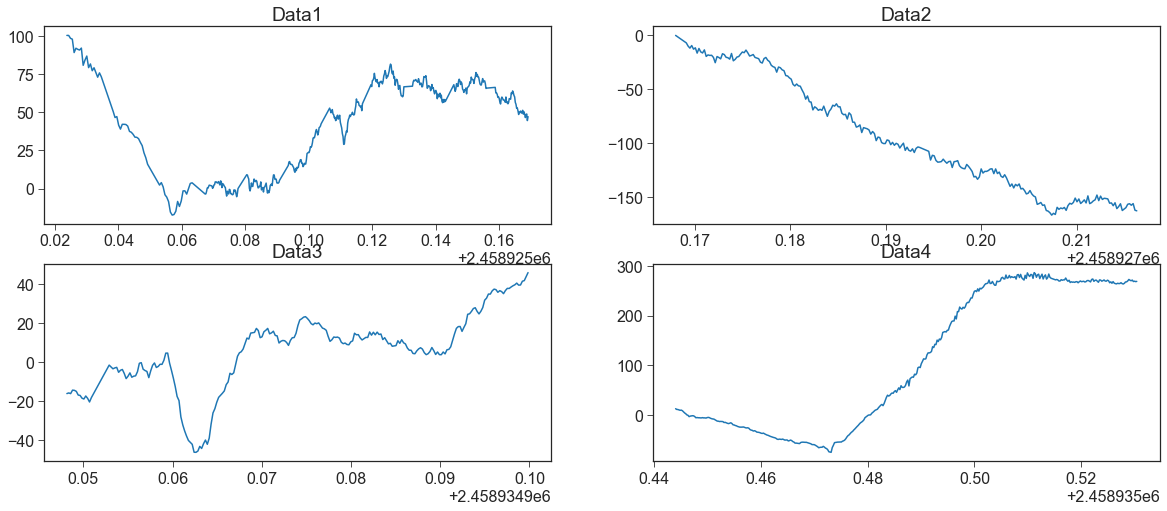

In [10]:
plt.figure(figsize=(20,8))

plt.subplot(221)
plt.plot(data1[:,0],data1[:,1])
plt.title('Data1')

plt.subplot(222)
plt.plot(data2[:,0],data2[:,1])
plt.title('Data2')

plt.subplot(223)
plt.plot(data3[:,0],data3[:,1])
plt.title('Data3')

plt.subplot(224)
plt.plot(data4[:,0],data4[:,1])
plt.title('Data4')


In [11]:
# X_test = newData[:,3:]
# y_test = newData[:,1]


# frames_0 = [df1, df2, df3, df4]
# frames_1 = [df1, df2, df3]
# frames_2 = [df1, df2]
# frames_3 = [df1]

# frame_tot = [df1, df2, df3, df4]

# X = np.array(pd.concat(frames_1))[:,3:]
# y = np.array(pd.concat(frames_1))[:,1]

# input = frame_tot

# output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
# output = output[1:]

In [12]:
# #X_test = newData[:,3:]
# X_test = np.array([newData[:,8], newData[:,14]]).T
# y_test = newData[:,1]

# time =  newData[:,0]

# plt.figure(figsize=(16,10))

# for i in tqdm(range(len(output))):
#     frames = output[i]
#     #X = np.array(pd.concat(frames))[:,3:]
#     X_rear, X_centre = np.array(pd.concat(frames))[:,8], np.array(pd.concat(frames))[:,14]
#     X = np.array([X_rear, X_centre]).T
#     y = np.array(pd.concat(frames))[:,1]
    
#     seed = 42

#     parameters_RandomSearch = {'eta': st.uniform(), 
#                                'num_round': st.randint(1,11),
#                                'max_depth': st.randint(1,10)}

#     clf_xgb = xgb.XGBRegressor(random_state = seed)

#     n_iter_search = 10

#     exp_var = make_scorer(explained_variance_score)
#     r2 = make_scorer(r2_score)



#     RandomSearch = RandomizedSearchCV(clf_xgb, 
#                                       param_distributions=parameters_RandomSearch, 
#                                       n_iter=n_iter_search, 
#                                       cv=5, 
#                                       return_train_score=True,
#                                       random_state=seed,
#                                       verbose = False,
#                                       scoring = exp_var)
    
#     RandomSearch.fit(X, y);
#     print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.5f}")
#     ypred = RandomSearch.predict(X_test)
    
#     if i == 0:
#         plt.plot(y_test, '.-', color='C0', linewidth = 8, label = 'True values')
#     plt.plot(ypred, '.', color=f'C{i+1}', linewidth = 2, label = f'Predicted values: output{i}')
#     plt.xlabel('Time')
#     plt.ylabel('RV')
#     plt.ylim(-50,50)
#     plt.legend(markerscale=3, loc='center left', bbox_to_anchor=(1, 0.5));
    
# plt.show

In [13]:
# seed = 42

# parameters_RandomSearch = {'eta': st.uniform(), 
#                            'num_round': st.randint(1,11),
#                            'max_depth': st.randint(1,10)}

# clf_xgb = xgb.XGBRegressor(random_state = seed)

# n_iter_search = 10

# exp_var = make_scorer(explained_variance_score)
# r2 = make_scorer(r2_score)



# RandomSearch = RandomizedSearchCV(clf_xgb, 
#                                   param_distributions=parameters_RandomSearch, 
#                                   n_iter=n_iter_search, 
#                                   cv=5, 
#                                   return_train_score=True,
#                                   random_state=seed,
#                                   verbose = False,
#                                   scoring = exp_var)

In [14]:
# RandomSearch.fit(X, y);

# RandomSearch_results = pd.DataFrame(RandomSearch.cv_results_)                 
# print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.5f}")

In [15]:
# model = xgb.XGBRegressor()
# model.fit(X, y);
# ypred = model.predict(X_test)

In [16]:
# time =  newData[:,0]

# plt.figure(figsize=(12,8))
# plt.plot(time,y_test, '.', color='C0', linewidth = 2, label = 'True values')
# plt.plot(time,ypred, '.', color='C1', linewidth = 2, label = 'Predicted values')
# plt.xlabel('Time')
# plt.ylabel('RV')
# plt.legend(markerscale=3);

In [17]:
# v3 = np.loadtxt('../../../Downloads/AllDatav3.txt')

# NN

In [29]:
# seed = 42

# time =  newData[:,0]

# X_test = newData[:,3:]
# y_test = newData[:,1]

# plt.figure(figsize=(12,8))

# for i in range(len(output)):
    
#     frames = output[i]
    
#     X = np.array(pd.concat(frames))[:,3:]
#     y = np.array(pd.concat(frames))[:,1]
    
#     scaler = StandardScaler()
#     scaler.fit(X)
#     StandardScaler(copy=True, with_mean=True, with_std=True)
#     X_train = scaler.transform(X)
#     X_test = scaler.transform(X_test)
    
#     mlp = MLPRegressor(hidden_layer_sizes=(28,27),max_iter=10000, learning_rate='adaptive', random_state=seed);
#     mlp.fit(X_train,y);
#     ypred = mlp.predict(X_test)

    
    
#     if i == 0:
#         plt.plot(time,y_test, '.', color='C0', linewidth = 2, label = 'True values')
#     plt.plot(time,ypred, '.', color=f'C{i+1}', linewidth = 2, label = f'Predicted values: frames_{i}')
#     plt.xlabel('Time')
#     plt.ylabel('RV')
#     plt.legend(markerscale=3);
    
# plt.show

# Med Jonathans NN random search

In [30]:
# seed = 42

# time =  newData[:,0]

# X_test = newData[:,3:]
# y_test = newData[:,1]


# # Create a model with no hyperparameters


# class hidden_layer:
#     def __init__(self, min_range, max_range, max_layers=2):
#         self.max_layers = max_layers
#         self.min_range = min_range
#         self.max_range = max_range
    
#     def rvs(self,random_state):
#         self.layers = np.random.randint(1,self.max_layers+1)
#         sizes = []
#         for i in range(self.layers):
#             if i==0:
#                 sizes.append( np.random.randint(self.min_range, self.max_range) )
#             elif sizes[i-1]==1:
#                 sizes.append( 1 )
#             else:
#                 sizes.append( np.random.randint(self.min_range, sizes[i-1]) )
#         return tuple(sizes)

# # Parameters to search
# parameters_RandomSearch = {
#     "activation": ["relu"],#, "logistic", "tanh"],
#     "hidden_layer_sizes": hidden_layer(1, 100, max_layers=5),
#     "learning_rate_init": st.uniform()
# }

# # Number of search rounds
# n_iter_search = 100

# plt.figure(figsize=(12,8))

# for i in tqdm(range(len(output))):

#     # Initialize
#     clf_NN = MLPRegressor(learning_rate = 'adaptive', solver='adam', early_stopping=True, max_iter=1000)
#     RandomSearch = RandomizedSearchCV(clf_NN, 
#                                       param_distributions=parameters_RandomSearch, 
#                                       n_iter=n_iter_search, 
#                                       cv=5,  
#                                       return_train_score=True,
#                                       random_state=0,
#                                       verbose = False, 
#                                       n_jobs = -1,
#                                       scoring = 'neg_root_mean_squared_error')


#     frames = output[i]
    
#     X = np.array(pd.concat(frames))[:,3:]
#     y = np.array(pd.concat(frames))[:,1]
    
#     # fit the random search instance
#     RandomSearch.fit(X, y);

#     print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.4f}")

#     y_pred = RandomSearch.predict(X_test)


#     if i == 0:
#         plt.plot(y_test, '.', color='C0', linewidth = 2, label = 'True values')
#     plt.plot(ypred, '.', color=f'C{i+1}', linewidth = 2, label = f'Predicted values: frames_{i}')
#     plt.xlabel('Time')
#     plt.ylabel('RV')
#     plt.legend(markerscale=3, loc='center left', bbox_to_anchor=(1, 0.5));

# plt.show

In [31]:
#names[8], names[14]

# Skaleret data

In [4]:
df1_s = np.loadtxt('data2\Data1scaled.txt')
df2_s = np.loadtxt('data2\Data2scaled.txt')
df3_s = np.loadtxt('data2\Data3scaled.txt')
df4_s = np.loadtxt('data2\Data4scaled.txt')
df5_s = np.loadtxt('data2\Data5scaled.txt')

In [5]:
frame_tot = [df1_s, df2_s, df4_s, df5_s]

input = frame_tot

output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
output = output[1:]

input_list = [1, 2, 4, 5]

output_list = sum([list(map(list, combinations(input_list, i))) for i in range(len(input_list) + 1)], [])
output_list = output_list[1:]

for i in range(len(output_list)):
    print(f' Frames_{i} = {output_list[i]}')

 Frames_0 = [1]
 Frames_1 = [2]
 Frames_2 = [4]
 Frames_3 = [5]
 Frames_4 = [1, 2]
 Frames_5 = [1, 4]
 Frames_6 = [1, 5]
 Frames_7 = [2, 4]
 Frames_8 = [2, 5]
 Frames_9 = [4, 5]
 Frames_10 = [1, 2, 4]
 Frames_11 = [1, 2, 5]
 Frames_12 = [1, 4, 5]
 Frames_13 = [2, 4, 5]
 Frames_14 = [1, 2, 4, 5]


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [07:44<00:00, 30.96s/it]


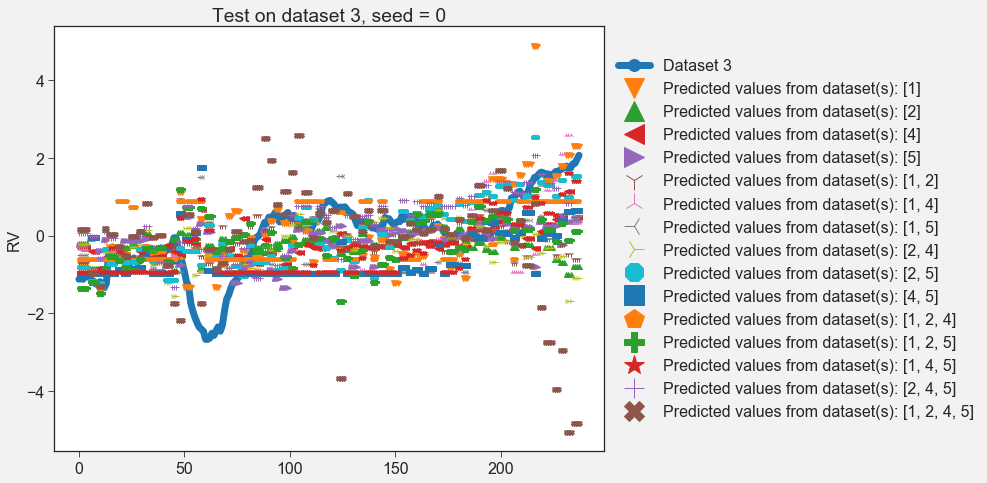

In [6]:
seed = 0

np.random.seed(seed=seed)
#time =  df5_s[:,0]

X_test = df3_s[:,3:]
y_test = df3_s[:,1]

# X_test = np.array([df1_s[:,8], df1_s[:,14]]).T
# y_test = df1_s[:,1]


# Create a model with no hyperparameters

save = True

class hidden_layer:
    def __init__(self, min_range, max_range, max_layers=2):
        self.max_layers = max_layers
        self.min_range = min_range
        self.max_range = max_range
    
    def rvs(self,random_state):
        self.layers = np.random.randint(1,self.max_layers+1)
        sizes = []
        for i in range(self.layers):
            if i==0:
                sizes.append( np.random.randint(self.min_range, self.max_range) )
            elif sizes[i-1]==1:
                sizes.append( 1 )
            else:
                sizes.append( np.random.randint(self.min_range, sizes[i-1]) )
        return tuple(sizes)

# Parameters to search
parameters_RandomSearch = {
    "activation": ["relu"],#, "logistic", "tanh"],
    "hidden_layer_sizes": hidden_layer(1, 100, max_layers=5),
    "learning_rate_init": st.uniform()
}

# Number of search rounds
n_iter_search = 100

markers = ['v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', '+', 'X']


fig = plt.figure(figsize=(14,7))


for i in tqdm(range(len(output))):
# for i in range(2):
    

    # Initialize
    clf_NN = MLPRegressor(learning_rate = 'adaptive', solver='adam', early_stopping=True, max_iter=1000, random_state=seed)
    RandomSearch = RandomizedSearchCV(clf_NN, 
                                      param_distributions=parameters_RandomSearch, 
                                      n_iter=n_iter_search, 
                                      cv=5,  
                                      return_train_score=True,
                                      random_state=seed,
                                      verbose = False, 
                                      n_jobs = -1,
                                      scoring = 'neg_root_mean_squared_error')


    frames = output[i]
    
#     X_rear, X_centre = np.array(np.concatenate((frames)))[:,8], np.array(np.concatenate((frames)))[:,14]
#     X = np.array([X_rear, X_centre]).T
    X = np.array(np.concatenate(frames))[:,3:]
    y = np.array(np.concatenate(frames))[:,1]
    
    # fit the random search instance
    RandomSearch.fit(X, y);

    #print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.4f}")

    ypred = RandomSearch.predict(X_test)


    if i == 0:
        plt.plot(y_test, '.-', color='C0', linewidth = 7, label = 'Dataset 3')
    plt.plot(ypred, '.', marker = markers[i], markersize = 5, color=f'C{i+1}', label = f'Predicted values from dataset(s): {output_list[i]}')
    plt.ylabel('RV')
    plt.legend(markerscale=4, loc='center left', bbox_to_anchor=(1, 0.5));

plt.title(f'Test on dataset 3, seed = 0')
    
fig.patch.set_facecolor('#f2f2f2')
plt.tight_layout()
plt.show

if save:
        fig.savefig(f'figs/AllCombsData3_seed0.png', dpi = 480, facecolor = fig.get_facecolor())

# XGBoost

In [35]:
# # X_test = df5_s[:,3:]
# # y_test = df5_s[:,1]

# X_test = np.array([df5_s[:,8], df5_s[:,14]]).T
# y_test = df5_s[:,1]




# for i in tqdm(range(len(output))):
    
#     plt.figure(figsize=(16,10))
    
#     frames = output[i]
#     #X = np.array(np.concatenate(frames))[:,3:]
#     y = np.array(np.concatenate(frames))[:,1]
#     X_rear, X_centre = np.array(np.concatenate((frames)))[:,8], np.array(np.concatenate((frames)))[:,14]
#     X = np.array([X_rear, X_centre]).T
    
    
#     seed = 42

#     parameters_RandomSearch = {'eta': st.uniform(), 
#                                'num_round': st.randint(1,11),
#                                'max_depth': st.randint(1,10)}

#     clf_xgb = xgb.XGBRegressor(random_state = seed)

#     n_iter_search = 10

#     exp_var = make_scorer(explained_variance_score)
#     r2 = make_scorer(r2_score)



#     RandomSearch = RandomizedSearchCV(clf_xgb, 
#                                       param_distributions=parameters_RandomSearch, 
#                                       n_iter=n_iter_search, 
#                                       cv=5, 
#                                       return_train_score=True,
#                                       random_state=seed,
#                                       verbose = False,
#                                       scoring = exp_var)
    
#     RandomSearch.fit(X, y);
#     print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.5f}")
#     ypred = RandomSearch.predict(X_test)
    
#     #if i == 0:
# #         plt.plot(y_test, '.-', color='C0', linewidth = 7, label = 'True values')
#     plt.plot(y_test, '.-', color='C0', linewidth = 7, label = 'True values')
#     plt.plot(ypred, '-', color='C1', linewidth = 2, label = f'Predicted values: output{i}')
#     plt.xlabel('Time')
#     plt.ylabel('RV')
#     plt.legend(markerscale=3, loc='center left', bbox_to_anchor=(1, 0.5));
    
#     plt.show

# Pride plot with NN

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [35:35<00:00, 427.14s/it]


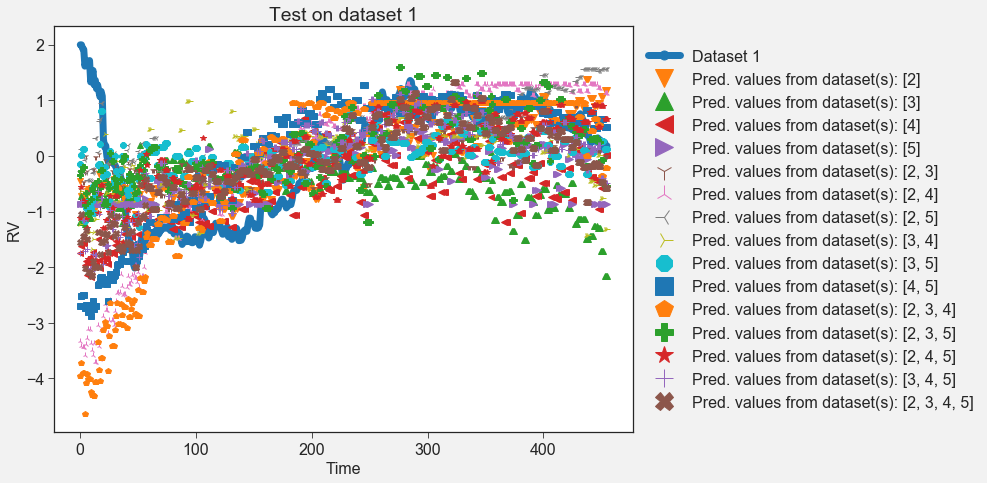

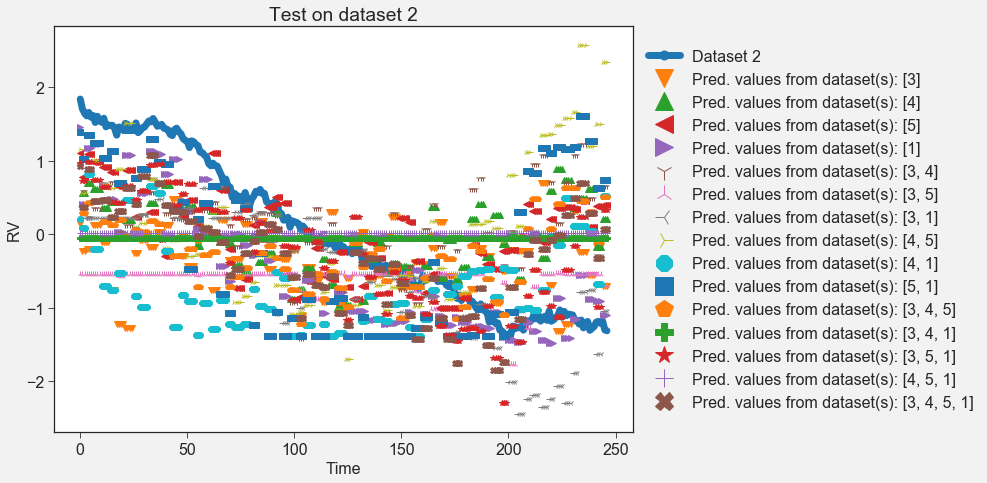

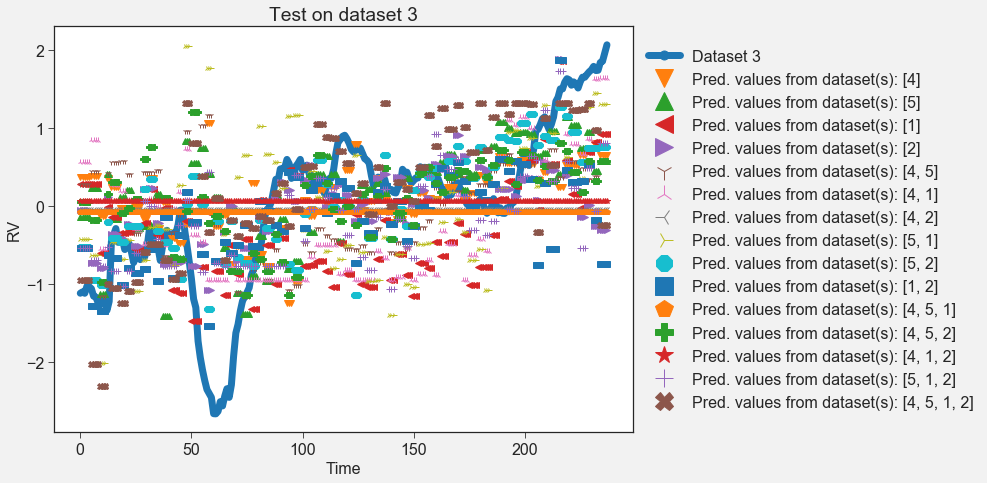

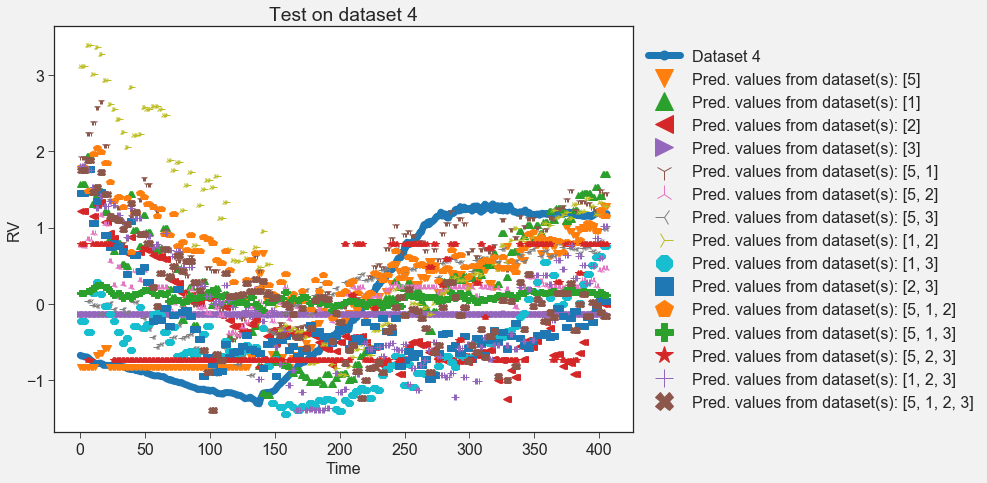

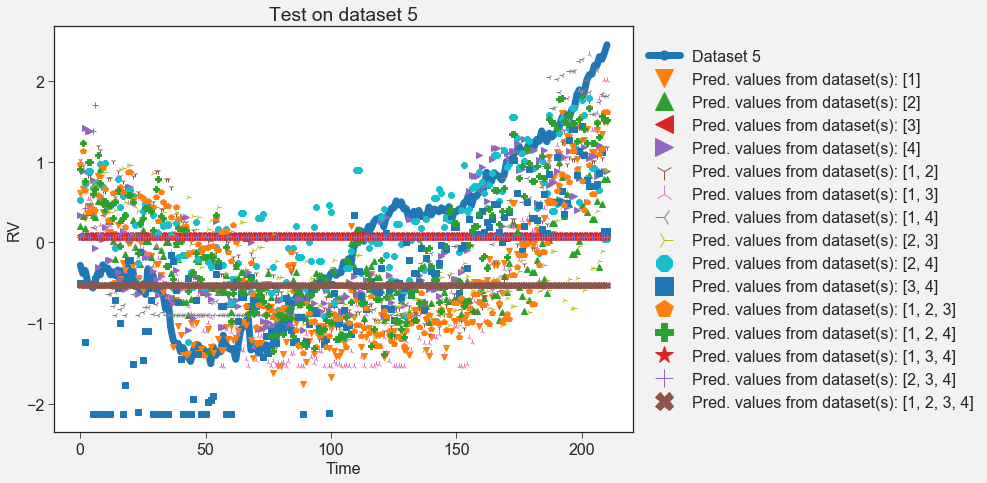

In [36]:
seed = 42

np.random.seed(seed=seed)

frame_tot = np.array(([df2_s, df3_s, df4_s, df5_s], [df3_s, df4_s, df5_s, df1_s],
                    [df4_s, df5_s, df1_s, df2_s], [df5_s, df1_s, df2_s, df3_s], [df1_s, df2_s, df3_s, df4_s]))

df_test = np.array([df1_s, df2_s, df3_s, df4_s, df5_s])

#--------------------------------------------------------------------------------------------------------#

input_list_1 = [2, 3, 4, 5]

output_list_1 = sum([list(map(list, combinations(input_list_1, i))) for i in range(len(input_list_1) + 1)], [])
output_list_1 = output_list_1[1:]

input_list_2 = [3, 4, 5, 1]

output_list_2 = sum([list(map(list, combinations(input_list_2, i))) for i in range(len(input_list_2) + 1)], [])
output_list_2 = output_list_2[1:]

input_list_3 = [4, 5, 1, 2]

output_list_3 = sum([list(map(list, combinations(input_list_3, i))) for i in range(len(input_list_3) + 1)], [])
output_list_3 = output_list_3[1:]

input_list_4 = [5, 1, 2, 3]

output_list_4 = sum([list(map(list, combinations(input_list_4, i))) for i in range(len(input_list_4) + 1)], [])
output_list_4 = output_list_4[1:]

input_list_5 = [1, 2, 3, 4]

output_list_5 = sum([list(map(list, combinations(input_list_5, i))) for i in range(len(input_list_5) + 1)], [])
output_list_5 = output_list_5[1:]

output_label = np.array([output_list_1, output_list_2, output_list_3, output_list_4, output_list_5])


#--------------------------------------------------------------------------------------------------------#



# Create a model with no hyperparameters


class hidden_layer:
    def __init__(self, min_range, max_range, max_layers=2):
        self.max_layers = max_layers
        self.min_range = min_range
        self.max_range = max_range
    
    def rvs(self,random_state):
        self.layers = np.random.randint(1,self.max_layers+1)
        sizes = []
        for i in range(self.layers):
            if i==0:
                sizes.append( np.random.randint(self.min_range, self.max_range) )
            elif sizes[i-1]==1:
                sizes.append( 1 )
            else:
                sizes.append( np.random.randint(self.min_range, sizes[i-1]) )
        return tuple(sizes)

# Parameters to search
parameters_RandomSearch = {
    "activation": ["relu"],#, "logistic", "tanh"],
    "hidden_layer_sizes": hidden_layer(1, 100, max_layers=5),
    "learning_rate_init": st.uniform()
}

# Number of search rounds
n_iter_search = 100

markers = ['v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', '+', 'X']

y_all = []

save = True

# for j in tqdm(range(len(df_test))):
for j in range(1):
    
    
    fig = plt.figure(figsize=(14,7))

    X_test = df_test[j][:,3:]
    y_test = df_test[j][:,1]
    
    # X_test = np.array([df_test[j][:,8], df_test[j][:,14]]).T
    # y_test = df_test[j][:,1]
    
    input = frame_tot[j]

    output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
    output = output[1:]
    
#     input_list = [1, 2, 3, 4]

#     output_list = sum([list(map(list, combinations(input_list, i))) for i in range(len(input_list) + 1)], [])
#     output_list = output_list[1:]


    y_temp = []

    for i in range(len(output)):


        # Initialize
        clf_NN = MLPRegressor(learning_rate = 'adaptive', solver='adam', early_stopping=True, max_iter=1000, random_state = seed)
        RandomSearch = RandomizedSearchCV(clf_NN, 
                                          param_distributions=parameters_RandomSearch, 
                                          n_iter=n_iter_search, 
                                          cv=5,  
                                          return_train_score=True,
                                          random_state=seed,
                                          verbose = False, 
                                          n_jobs = -1,
                                          scoring = 'neg_root_mean_squared_error')


        frames = output[i]
        
        test = np.array(frames)
        #print(test.shape)

    #     X_rear, X_centre = np.array(np.concatenate((frames)))[:,8], np.array(np.concatenate((frames)))[:,14]
    #     X = np.array([X_rear, X_centre]).T
        X = np.array(np.concatenate(frames))[:,3:]
        y = np.array(np.concatenate(frames))[:,1]
        
        #print(X.shape, y.shape)

        # fit the random search instance
        RandomSearch.fit(X, y);

        #print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.4f}")

        ypred = RandomSearch.predict(X_test)
        
        y_temp.append(ypred)

        if i == 0:
            plt.plot(y_test, '.-', color='C0', linewidth = 7, label = f'Dataset {j+1}')
        #plt.plot(y_test, '.-', color='C0', linewidth = 7, label = 'True values')
        plt.plot(ypred, '.', marker = markers[i], color=f'C{i+1}', markersize = 3, label = f'Pred. values from dataset(s): {output_label[j,i]}')
        #plt.xlabel('Time')
        plt.ylabel('RV')
        #plt.ylim(-2,3)
        plt.legend(markerscale=3, loc='center left', bbox_to_anchor=(1, 0.5));
        
    y_all.append(y_temp)
        
    plt.title(f'Test on dataset {j+1}, seed = 42')
    
    fig.patch.set_facecolor('#f2f2f2')
    plt.tight_layout()
    plt.show
    
    if save:
        fig.savefig(f'figs/AllCombsDataset_{j+1}.png', dpi = 480, facecolor = fig.get_facecolor())
        
    #print(f' Number of completed iterations: {j+1}/5')

In [40]:
print(np.array(y_all).shape)

(5, 15)


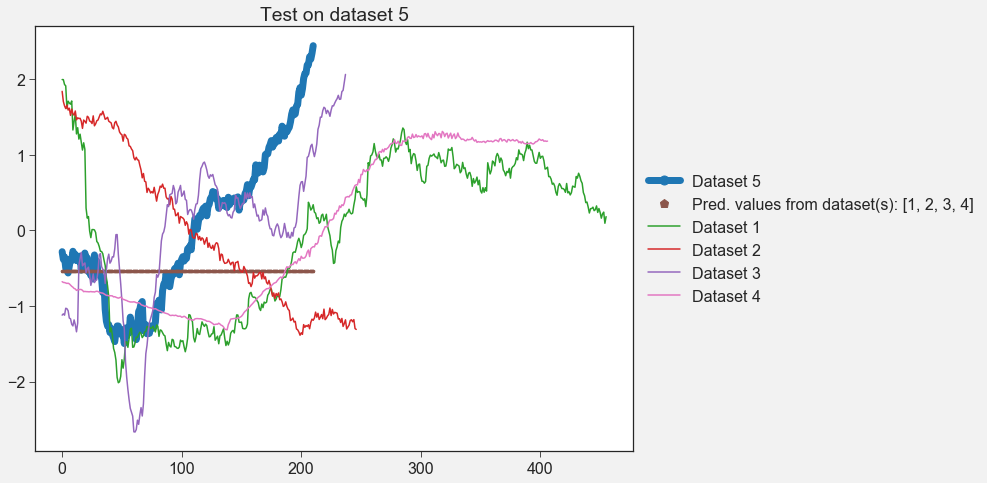

In [114]:
fig = plt.figure(figsize=(14,7))

plt.plot(y_test, '.-', color='C0', linewidth = 7, label = f'Dataset 5')

plt.plot(np.array(y_all)[4,14], '.', marker = markers[10], color=f'C15', 
         markersize = 3, label = f'Pred. values from dataset(s): {output_label[4,14]}')


plt.plot(df1_s[:,1], color = 'C2', label = 'Dataset 1')
plt.plot(df2_s[:,1], color = 'C3', label = 'Dataset 2')
plt.plot(df3_s[:,1], color = 'C4', label = 'Dataset 3')
plt.plot(df4_s[:,1], color = 'C6', label = 'Dataset 4')

plt.ylabel('RV')

plt.legend(markerscale=3, loc='center left', bbox_to_anchor=(1, 0.5));
        

plt.title(f'Test on dataset 5')

fig.patch.set_facecolor('#f2f2f2')
plt.tight_layout()

In [121]:
# fig = plt.figure(figsize=(14,7))

# for i in range(15):

#     plt.plot(y_test, '.-', color='C0', linewidth = 7, label = f'Dataset 5')

#     plt.plot(np.array(y_all)[4,i], '.', marker = markers[14], color=f'C15', 
#              markersize = 3, label = f'Pred. values from dataset(s): {output_label[4,14]}')
    
#     plt.show()


# # plt.plot(df1_s[:,1], color = 'C2', label = 'Dataset 1')
# # plt.plot(df2_s[:,1], color = 'C3', label = 'Dataset 2')
# # plt.plot(df3_s[:,1], color = 'C4', label = 'Dataset 3')
# # plt.plot(df4_s[:,1], color = 'C6', label = 'Dataset 4')



# plt.legend(markerscale=3, loc='center left', bbox_to_anchor=(1, 0.5));
        
# plt.title(f'Test on dataset 5')

# fig.patch.set_facecolor('#f2f2f2')
# plt.tight_layout()


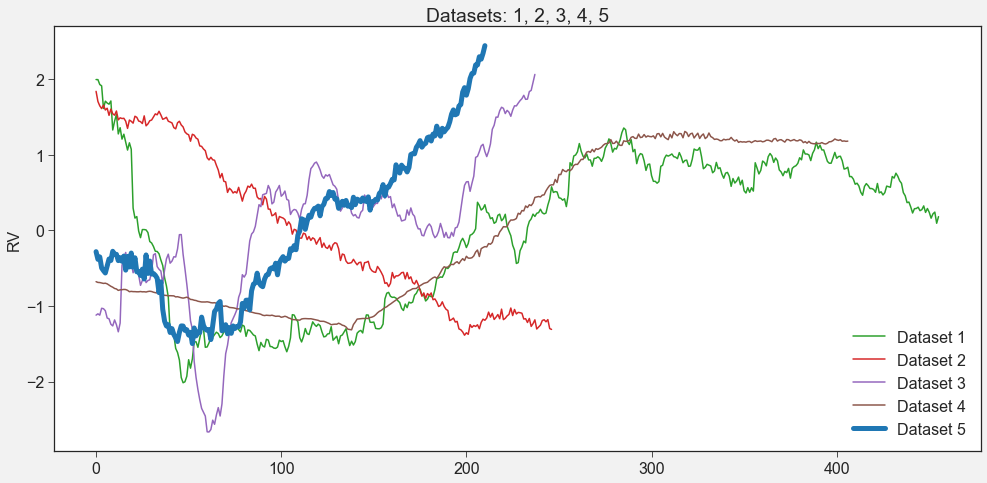

In [8]:
save = True

fig = plt.figure(figsize=(14,7))

plt.plot(df1_s[:,1], color = 'C2', label = 'Dataset 1')
plt.plot(df2_s[:,1], color = 'C3', label = 'Dataset 2')
plt.plot(df3_s[:,1], color = 'C4', label = 'Dataset 3')
plt.plot(df4_s[:,1], color = 'C5', label = 'Dataset 4')
plt.plot(df5_s[:,1], color = 'C0', linewidth = 5, label = 'Dataset 5')



plt.ylabel('RV')

plt.legend(markerscale=3, loc='lower right')#, bbox_to_anchor=(1, 0.5));
        

plt.title(f'Datasets: 1, 2, 3, 4, 5')

fig.patch.set_facecolor('#f2f2f2')
plt.tight_layout()

if save:
        fig.savefig(f'figs/Datasets1234.png', dpi = 480, facecolor = fig.get_facecolor())